In [3]:
%pip install pandas
%pip install numpy
%pip install matplotlib


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [34]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [35]:
df = pd.read_csv("churn-dataset.csv")
df.sample(5)

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
4366  0537-QYZZN    Male              1     Yes        Yes      24   
722   4952-YSOGZ  Female              0     Yes        Yes       4   
2000  7020-OZKXZ  Female              1      No         No       9   
1125  8111-SLLHI    Male              1     Yes         No      39   
2827  1845-ZLLIG    Male              0      No         No       1   

     PhoneService MultipleLines InternetService OnlineSecurity  ...  \
4366          Yes           Yes     Fiber optic            Yes  ...   
722           Yes           Yes     Fiber optic             No  ...   
2000          Yes            No     Fiber optic             No  ...   
1125          Yes           Yes     Fiber optic             No  ...   
2827          Yes            No             DSL             No  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
4366               No          No          No              No  Month-to-month   
722                No          No          No             Yes  Month-to-month   
2000              Yes          No          No              No  Month-to-month   
1125              Yes          No         Yes             Yes  Month-to-month   
2827               No          No          No              No  Month-to-month   

     PaperlessBilling            PaymentMethod MonthlyCharges  TotalCharges  \
4366              Yes         Electronic check          79.85       1857.75   
722               Yes         Electronic check          85.95         381.3   
2000               No  Credit card (automatic)          75.50         637.4   
1125              Yes         Electronic check         105.65        4284.8   
2827              Yes             Mailed check          50.15         50.15   

     Churn  
4366    No  
722    Yes  
2000    No  
1125   Yes  
2827    No  

[5 rows x 21 columns]

In [36]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [37]:
#when building machine learning model custId is not helpful so drop it
#inplace = True will update the table
df.drop('customerID',axis='columns', inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [38]:
df.TotalCharges.values
#these are giving string values 

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [39]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [40]:
#convert string to numeric
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [41]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
488   Female              0     Yes        Yes       0           No   
753     Male              0      No        Yes       0          Yes   
936   Female              0     Yes        Yes       0          Yes   
1082    Male              0     Yes        Yes       0          Yes   
1340  Female              0     Yes        Yes       0           No   
3331    Male              0     Yes        Yes       0          Yes   
3826    Male              0     Yes        Yes       0          Yes   
4380  Female              0     Yes        Yes       0          Yes   
5218    Male              0     Yes        Yes       0          Yes   
6670  Female              0     Yes        Yes       0          Yes   
6754    Male              0      No        Yes       0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
488   No phone service             DSL                  Yes   
753                 No              No  No internet service   
936                 No             DSL                  Yes   
1082               Yes              No  No internet service   
1340  No phone service             DSL                  Yes   
3331                No              No  No internet service   
3826               Yes              No  No internet service   
4380                No              No  No internet service   
5218                No              No  No internet service   
6670               Yes             DSL                   No   
6754               Yes             DSL                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
488                    No                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                  Yes                   No   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                  Yes                   No                  Yes   

              StreamingTV      StreamingMovies  Contract PaperlessBilling  \
488                   Yes                   No  Two year              Yes   
753   No internet service  No internet service  Two year               No   
936                   Yes                  Yes  Two year               No   
1082  No internet service  No internet service  Two year               No   
1340                  Yes                   No  Two year               No   
3331  No internet service  No internet service  Two year               No   
3826  No internet service  No internet service  Two year               No   
4380  No internet service  No internet service  Two year               No   
5218  No internet service  No internet service  One year              Yes   
6670                  Yes                   No  Two year               No   
6754                   No                   No  Two year              Yes   

                  PaymentMethod  MonthlyCharges TotalCharges Churn  
488   Bank transfer (automatic)           52.55                 No  
753                Mailed check           20.25                 No  
936                Mailed check           80.85                 No  
1082               Mailed check           25.75                 No  
1340    Credit card (automatic)           56.05                 No  
3331               Mailed check           19.85                 No  
3826               Mailed check           25.35                 No  
4380               Mailed check           20.00                 No

In [42]:
#as the above rows are null TotalCharges
df.iloc[488]


gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [43]:
#drop above rows
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [44]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [45]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

/var/folders/ts/j3_qqbtn6kq12rppy8r86btw0000gn/T/ipykernel_5682/973151263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [46]:
df1.TotalCharges.dtypes

dtype('float64')

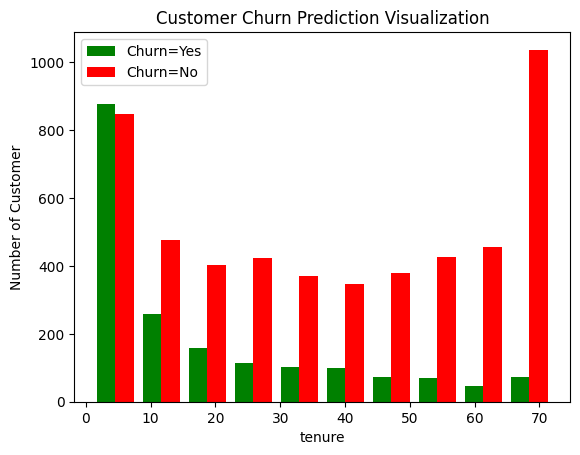

In [47]:
#to see the customer's tenure acc to churn = no (not leaving)
tunure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number of Customer")
plt.title("Customer Churn Prediction Visualization")

plt.hist([tenure_churn_yes,tunure_churn_no], color=['green', 'red'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

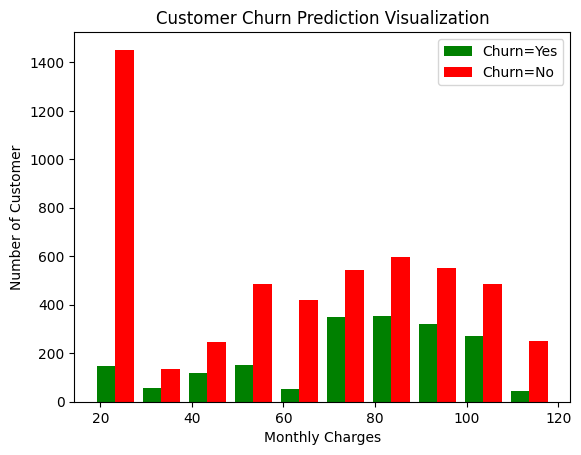

In [48]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges

plt.xlabel("Monthly Charges")
plt.ylabel("Number of Customer")
plt.title("Customer Churn Prediction Visualization")

blood_sugar_men = [113, 85,]
plt.hist([mc_churn_yes,mc_churn_no], color=['green', 'red'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

In [49]:
#get unique values
def print_unique_col_values(df):
    for col in df:
        if df[col].dtypes=='object':
            print(f'{col}: {df[col].unique()}')


In [50]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [51]:
#inorder to get Yes no type data
df1.replace('No internet service', 'No', inplace=True)
df1.replace('No phone service', 'No', inplace=True)


/var/folders/ts/j3_qqbtn6kq12rppy8r86btw0000gn/T/ipykernel_5682/1760106523.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service', 'No', inplace=True)
/var/folders/ts/j3_qqbtn6kq12rppy8r86btw0000gn/T/ipykernel_5682/1760106523.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service', 'No', inplace=True)


In [52]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [53]:
#convert yes=1 no=0

yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

/var/folders/ts/j3_qqbtn6kq12rppy8r86btw0000gn/T/ipykernel_5682/1659836597.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].replace({'Yes': 1,'No': 0},inplace=True)
/var/folders/ts/j3_qqbtn6kq12rppy8r86btw0000gn/T/ipykernel_5682/1659836597.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)

In [54]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [55]:
#same for female and male 
df1['gender'].replace({'Female':1, 'Male':0},inplace=True)

/var/folders/ts/j3_qqbtn6kq12rppy8r86btw0000gn/T/ipykernel_5682/3204696110.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['gender'].replace({'Female':1, 'Male':0},inplace=True)
/var/folders/ts/j3_qqbtn6kq12rppy8r86btw0000gn/T/ipykernel_5682/3204696110.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcastin

In [56]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [57]:
# Using Dummy Variables and One Hot Encoding
# Ex.: Under "Contract" column we have different categories and we cant give them values as 0/1
#do we will divide it in the number of cols "COntract" column has
# i.e. 'Month-to-month' 'One year' 'Two year' 3 columns will be added 

In [65]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          1              0        1           0       1             0   
1          0              0        0           0      34             1   
2          0              0        0           0       2             1   
3          0              0        0           0      45             0   
4          1              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       0              0        1           1      24             1   
7039       1              0        1           1      72             1   
7040       1              0        1           1      11             0   
7041       0              1        1           0       4             1   
7042       0              0        0           0      66             1   

      MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0                 0               0             1                 0  ...   
1                 0               1             0                 1  ...   
2                 0               1             1                 0  ...   
3                 0               1             0                 1  ...   
4                 0               0             0                 0  ...   
...             ...             ...           ...               ...  ...   
7038              1               1             0                 1  ...   
7039              1               0             1                 1  ...   
7040              0               1             0                 0  ...   
7041              1               0             0                 0  ...   
7042              0               1             0                 1  ...   

      InternetService_DSL  InternetService_Fiber optic  InternetService_No  \
0                    True                        False               False   
1                    True                        False               False   
2                    True                        False               False   
3                    True                        False               False   
4                   False                         True               False   
...                   ...                          ...                 ...   
7038                 True                        False               False   
7039                False                         True               False   
7040                 True                        False               False   
7041                False                         True               False   
7042                False                         True               False   

      Contract_Month-to-month  Contract_One year  Contract_Two year  \
0                        True              False              False   
1                       False               True              False   
2                        True              False              False   
3                       False               True              False   
4                        True              False              False   
...                       ...                ...                ...   
7038                    False               True              False   
7039                    False               True              False   
7040                     True              False              False   
7041                     True              False              False   
7042                    False              False               True   

      PaymentMethod_Bank transfer (automatic)  \
0                                       False   
1                                       False   
2                                       False   
3                                        True   
4                                       False   
...                                       ...   
7038                                    False   
7039                  

In [66]:
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [67]:
#Convert True/False to 1/0 Using .astype(int)
df2.astype(int)

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          1              0        1           0       1             0   
1          0              0        0           0      34             1   
2          0              0        0           0       2             1   
3          0              0        0           0      45             0   
4          1              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       0              0        1           1      24             1   
7039       1              0        1           1      72             1   
7040       1              0        1           1      11             0   
7041       0              1        1           0       4             1   
7042       0              0        0           0      66             1   

      MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0                 0               0             1                 0  ...   
1                 0               1             0                 1  ...   
2                 0               1             1                 0  ...   
3                 0               1             0                 1  ...   
4                 0               0             0                 0  ...   
...             ...             ...           ...               ...  ...   
7038              1               1             0                 1  ...   
7039              1               0             1                 1  ...   
7040              0               1             0                 0  ...   
7041              1               0             0                 0  ...   
7042              0               1             0                 1  ...   

      InternetService_DSL  InternetService_Fiber optic  InternetService_No  \
0                       1                            0                   0   
1                       1                            0                   0   
2                       1                            0                   0   
3                       1                            0                   0   
4                       0                            1                   0   
...                   ...                          ...                 ...   
7038                    1                            0                   0   
7039                    0                            1                   0   
7040                    1                            0                   0   
7041                    0                            1                   0   
7042                    0                            1                   0   

      Contract_Month-to-month  Contract_One year  Contract_Two year  \
0                           1                  0                  0   
1                           0                  1                  0   
2                           1                  0                  0   
3                           0                  1                  0   
4                           1                  0                  0   
...                       ...                ...                ...   
7038                        0                  1                  0   
7039                        0                  1                  0   
7040                        1                  0                  0   
7041                        1                  0                  0   
7042                        0                  0                  1   

      PaymentMethod_Bank transfer (automatic)  \
0                                           0   
1                                           0   
2                                           0   
3                                           1   
4                                           0   
...                                       ...   
7038                                        0   
7039                  

In [68]:
columns_to_convert = ['InternetService_DSL',
       'InternetService_Fiber optic', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']
df2[columns_to_convert] = df2[columns_to_convert].astype('uint8')


In [69]:
df2.sample(5)

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
3973       1              0        1           1      43             0   
4479       1              0        0           0      59             1   
1530       0              0        1           1       2             1   
1236       0              0        0           0       3             1   
3573       1              0        1           1      28             1   

      MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
3973              0               1             0                 1  ...   
4479              1               0             0                 0  ...   
1530              0               0             0                 1  ...   
1236              1               0             0                 0  ...   
3573              0               0             0                 0  ...   

      InternetService_DSL  InternetService_Fiber optic  InternetService_No  \
3973                    1                            0               False   
4479                    0                            0                True   
1530                    0                            1               False   
1236                    0                            1               False   
3573                    0                            0                True   

      Contract_Month-to-month  Contract_One year  Contract_Two year  \
3973                        0                  1                  0   
4479                        0                  0                  1   
1530                        1                  0                  0   
1236                        1                  0                  0   
3573                        1                  0                  0   

      PaymentMethod_Bank transfer (automatic)  \
3973                                        0   
4479                                        0   
1530                                        0   
1236                                        0   
3573                                        1   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
3973                                      1                               0   
4479                                      0                               1   
1530                                      1                               0   
1236                                      0                               1   
3573                                      0                               0   

      PaymentMethod_Mailed check  
3973                           0  
4479                           0  
1530                           0  
1236                           0  
3573                           0  

[5 rows x 27 columns]

In [70]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [ ]:
%pip install scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 37.9 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 41.7 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [71]:
#scaling
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [72]:
df2.sample(5)

gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
1948       1              0        0           0  0.014085             1   
3830       0              0        1           0  0.042254             1   
2030       0              0        0           1  0.014085             1   
348        1              0        0           0  0.309859             0   
1614       0              0        1           0  0.929577             0   

      MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
1948              0               0             0                 0  ...   
3830              1               0             1                 0  ...   
2030              1               1             1                 0  ...   
348               0               0             0                 0  ...   
1614              0               1             1                 0  ...   

      InternetService_DSL  InternetService_Fiber optic  InternetService_No  \
1948                    0                            1               False   
3830                    0                            1               False   
2030                    1                            0               False   
348                     1                            0               False   
1614                    1                            0               False   

      Contract_Month-to-month  Contract_One year  Contract_Two year  \
1948                        1                  0                  0   
3830                        1                  0                  0   
2030                        1                  0                  0   
348                         1                  0                  0   
1614                        0                  0                  1   

      PaymentMethod_Bank transfer (automatic)  \
1948                                        0   
3830                                        0   
2030                                        1   
348                                         0   
1614                                        1   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
1948                                      0                               1   
3830                                      0                               1   
2030                                      0                               0   
348                                       0                               1   
1614                                      0                               0   

      PaymentMethod_Mailed check  
1948                           0  
3830                           0  
2030                           0  
348                            0  
1614                           0  

[5 rows x 27 columns]

In [73]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

NOW DATASET IS READY TO USE IN MACHINE LEARNING!!! 
YEAYYYYY!!

In [74]:
# X AND Y 
X = df2.drop('Churn',axis='columns')
Y = df2['Churn']

In [ ]:
%pip install sklearn

  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
   

In [75]:
#TRAIN AND TEST SPLIT

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=5)

In [76]:
X_train.shape

(5625, 26)

In [77]:
X_test.shape

(1407, 26)

In [78]:
X_train[:10]

gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
5664       1              1        0           0  0.126761             1   
101        1              0        1           1  0.000000             1   
2621       0              0        1           0  0.985915             1   
392        1              1        0           0  0.014085             1   
1327       0              0        1           0  0.816901             1   
3607       1              0        0           0  0.169014             1   
2773       0              0        1           0  0.323944             0   
1936       1              0        1           0  0.704225             1   
5387       0              0        0           0  0.042254             0   
4331       0              0        0           0  0.985915             1   

      MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
5664              0               0             0                 1  ...   
101               0               0             0                 0  ...   
2621              0               0             1                 1  ...   
392               0               0             0                 0  ...   
1327              1               0             0                 1  ...   
3607              0               1             0                 0  ...   
2773              0               0             0                 1  ...   
1936              0               1             1                 0  ...   
5387              0               0             0                 0  ...   
4331              1               0             0                 0  ...   

      InternetService_DSL  InternetService_Fiber optic  InternetService_No  \
5664                    0                            1               False   
101                     0                            0                True   
2621                    1                            0               False   
392                     1                            0               False   
1327                    0                            1               False   
3607                    1                            0               False   
2773                    1                            0               False   
1936                    1                            0               False   
5387                    1                            0               False   
4331                    0                            0                True   

      Contract_Month-to-month  Contract_One year  Contract_Two year  \
5664                        1                  0                  0   
101                         1                  0                  0   
2621                        0                  0                  1   
392                         1                  0                  0   
1327                        0                  1                  0   
3607                        0                  1                  0   
2773                        1                  0                  0   
1936                        0                  1                  0   
5387                        1                  0                  0   
4331                        0                  0                  1   

      PaymentMethod_Bank transfer (automatic)  \
5664                                        0   
101                                         0   
2621                                        0   
392                                         0   
1327                                        1   
3607                                        0   
2773                                        0   
1936                                        1   
5387                                        0   
4331                                        1   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
5664                                      1                             

In [ ]:
len(X_train.columns)

26

In [ ]:
%pip install tensorflow

  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached setuptools-74.0.0-py3-none-any.whl.metadata (6.7 kB)
  Using cached charset_normalizer-3.3.2-cp312-cp312-macosx_11_0_arm64.whl.metadata (33 kB)
  Using cached urllib3-2.2.2-py3-none-any.whl.metadata (6.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.3/236.3 MB 34.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.6/10.6 MB 50.4 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 49.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 44.9 MB/s eta 0:00:00a 0:00:01
Using cached requests-2.32.3-py3-none-any.whl (64 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 40.0 MB/s eta 0:00:00
Using cached setuptools-74.0.0-py3-none-any.whl (1.3 MB)
Using cached chars

In [79]:
import tensorflow as tf
from tensorflow import keras

In [81]:
#NEURAL MODEL
model = keras.Sequential([
    #INPUT LAYER
    keras.layers.Dense(20, input_shape=(26,), activation='relu'), #same as column i.e.26
    #HIDDEN LAYER , SHAPE IS DERIVED FROM DENSE LAYER
    keras.layers.Dense(1, activation='sigmoid'),

])

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, Y_train,epochs=50)

Epoch 1/50


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 279us/step - accuracy: 0.7349 - loss: 0.5735 
Epoch 2/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 229us/step - accuracy: 0.7967 - loss: 0.4314
Epoch 3/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 230us/step - accuracy: 0.7951 - loss: 0.4191
Epoch 4/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 228us/step - accuracy: 0.8017 - loss: 0.4169
Epoch 5/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 229us/step - accuracy: 0.7972 - loss: 0.4227
Epoch 6/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 233us/step - accuracy: 0.7966 - loss: 0.4276
Epoch 7/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step - accuracy: 0.8014 - loss: 0.4205
Epoch 8/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 231us/step - accuracy: 0.8148 - loss: 0.4030
Epoch 9/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step - accuracy: 0.7934 - loss: 0.4139
Epoch 10/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step - accuracy: 0.8089 - loss: 0.4090
Epoch 11/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step - accuracy: 0.8093 - loss: 0.4062
Epoch 12/50
176/176 ━━━━━━━━━━━━━━━━━━━━

In [82]:
#evaluating the accuracy on x and y axis
model.evaluate(X_test, Y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step - accuracy: 0.7963 - loss: 0.4293


[0.44084876775741577, 0.7874911427497864]

In [83]:
#y predicted
yp = model.predict(X_test)
yp[:5]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step


array([[0.2654466 ],
       [0.47412172],
       [0.01988172],
       [0.89300674],
       [0.43267468]], dtype=float32)

In [84]:
#to compare yp and Y_test
Y_test[:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

In [85]:
y_pred = []
for e in yp:
    if e > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [86]:
y_pred[0:5]

[0, 0, 0, 1, 0]

In [87]:
Y_test[:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

HUrayyyy! We have achieved 80% accuracy


In [89]:
%pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
    

In [92]:
#classification report
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86       999
           1       0.67      0.54      0.59       408

    accuracy                           0.79      1407
   macro avg       0.75      0.71      0.73      1407
weighted avg       0.78      0.79      0.78      1407



In [93]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


Text(95.72222222222221, 0.5, 'Truth')

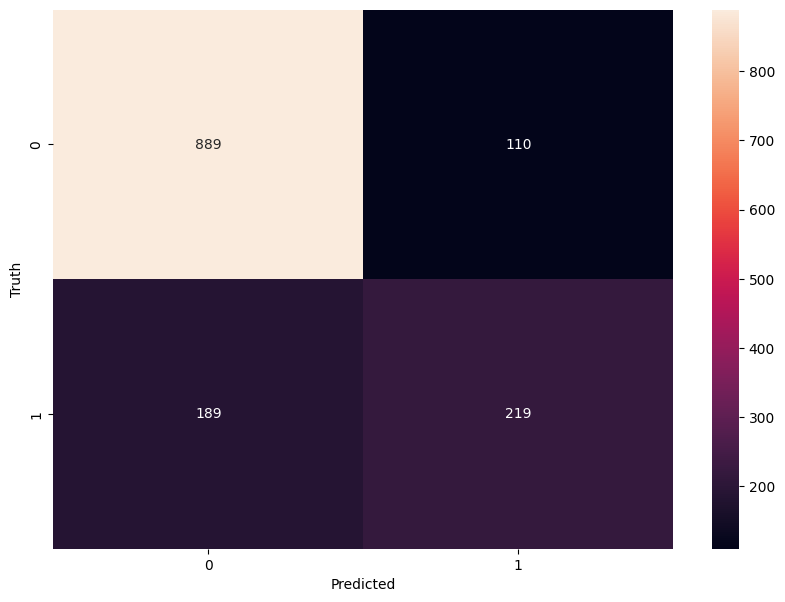

In [95]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=Y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Here 889 and 219 are correct predictions
189 and 110 are wrong ones

In [100]:
#accuracy is correct prediction/total prediction
(889+219)/(889+110+189+219)

0.7874911158493249

so 0.78 and from table above accuracy inder f1-score is 0.79

In [103]:
# Precision for 0 class. i.e. Precision for customers who did not churn
round((889/(889+189)),2)

0.82

In [104]:
#Precision for 1 class. i.e. Precision for customers who actually churned
round(219/(219+110), 2)

0.67

In [106]:
#Recall for 0 class
round(889/(889+110),2)

0.89

In [107]:
round(219/(219+189),2)

0.54